### Importing Data

In [46]:
# import re
dataFilePath = "dataset/sample.md"

dataFile = open(dataFilePath)

### Parameters

In [47]:
elementCount = 60

## Converting Raw Data to Array

In [48]:
include_Product_Name_in_Dataset = 1

dictionary = {}

ingdList = []

buf = []
for line in dataFile.readlines():
    if(len(line) > 2):
        ## Check if new ingridient has started
        if (line[1] == "." or line[2] == "."): # or line[3] == "."):
            # store product name
            # words = line.split(' ')
            # words 


            # store ingridients from buf to list
            # ingdList.append(buf)
            # buf = []
            # if(len(buf) > 0):
            if(buf != []):
                ingdList.append(buf)
                buf = []
        else:
            spaceCount = line.count(' ')
            newLineCount = line.count('\n')

            # check if it has other character than space and new line
            if (spaceCount + newLineCount != len(line)):
              if(line[0] == '-' or line[0] == '.'):
                line = line[1:]
                while(line[0] == ' '):
                  line = line[1:]
                while(line[-1] == '\n'):
                  line = line[0:-1]
                buf.append(line)


print(ingdList)

[['Milk Fat (80%), Moisture (16%), Salt (3%), permitted natural color (Annatto)'], ['Sugar, Milk Solids (23%), Cocoa Butter, Cocoa Solids, Emulsifiers (442, 476), Vegetable Fat, Maltitol, Flavoring Substances, Contains added flavors (Artificial (Vanilla and Chocolate)), Sweetener (Maltitol (965 I)).'], ['Moong Dal (52%), Edible Vegetable Oil, Salt, Red Chilli Powder, Black Pepper Powder, Cumin Powder, Dry Ginger Powder.'], ['Noodles: Wheat Flour, Palm Oil, Salt, Wheat Gluten, Mineral (Calcium Carbonate), Guar Gum, Sodium Tripolyphosphate, Potassium Carbonate, Sodium Carbonate. Masala Tastemaker: Hydrolysed groundnut (peanut) protein, Mixed spices {(23.9%) (Dehydrated onion, Coriander powder, Red chilli powder (3.3%), Turmeric powder, Ginger powder, Cumin powder, Aniseed, Fenugreek powder, Garlic powder, Clove powder, Black pepper powder)}, Noodle Powder {Wheat flour, Palm oil, Salt, Wheat gluten, Mineral (Calcium carbonate), Guar gum, Sodium triphosphate, Potassium carbonate, Sodium ca

### Remove brackets and spaces

In [49]:
### Remove brackets and spaces in ingridients
for indx, ingdOf1 in enumerate(ingdList):
    ingds = ingdOf1[0].split(",")
    for i, ingd in enumerate(ingds):
        if(ingd.__contains__('(')):
            ingds[i] = ingd[0:ingd.find('(')]
        while(ingds[i][-1] == ' '):
            ingds[i] = ingds[i][0:-1]
        while(ingds[i][0] == ' '):
            ingds[i] = ingds[i][1:]
    ingdList[indx] = ingds
        # ingds[i] = ingd.replace('(', '')
        # ingds[i] = ingd.replace(')', '')
        # ingd = ingd.replace(' ', '')
    

In [50]:
print(ingdList)

[['Milk Fat', 'Moisture', 'Salt', 'permitted natural color'], ['Sugar', 'Milk Solids', 'Cocoa Butter', 'Cocoa Solids', 'Emulsifiers', '476)', 'Vegetable Fat', 'Maltitol', 'Flavoring Substances', 'Contains added flavors', 'Sweetener'], ['Moong Dal', 'Edible Vegetable Oil', 'Salt', 'Red Chilli Powder', 'Black Pepper Powder', 'Cumin Powder', 'Dry Ginger Powder.'], ['Noodles: Wheat Flour', 'Palm Oil', 'Salt', 'Wheat Gluten', 'Mineral', 'Guar Gum', 'Sodium Tripolyphosphate', 'Potassium Carbonate', 'Sodium Carbonate. Masala Tastemaker: Hydrolysed groundnut', 'Mixed spices {', 'Coriander powder', 'Red chilli powder', 'Turmeric powder', 'Ginger powder', 'Cumin powder', 'Aniseed', 'Fenugreek powder', 'Garlic powder', 'Clove powder', 'Black pepper powder)}', 'Noodle Powder {Wheat flour', 'Palm oil', 'Salt', 'Wheat gluten', 'Mineral', 'Guar gum', 'Sodium triphosphate', 'Potassium carbonate', 'Sodium carbonate}', 'Sugar', 'Edible starch', 'Palm oil', 'Acidifying agent', 'Colour', 'Salt', 'Mineral'

In [82]:
def toLetters(input):
    valids = []
    for character in input:
        if character.isalpha():
            valids.append(character)
    return ''.join(valids)

def getWordComponents(inpList):
    subIng = []
    for subindx, ingd in enumerate(inpList):
        sub = ingd.split(' ')   # ['Milk', 'Fat']
        for x in sub:
            converted = toLetters(x.lower())
            if(len(converted) > 0):
                subIng.append(converted)
    return subIng


## Separating ingridient by space and to lower

In [83]:
seprdIngdList = []
### Split ingridients by space also
for indx, ingdOf1 in enumerate(ingdList):
    seprdIngdList.append(getWordComponents(ingdOf1))

In [84]:
seprdIngdList

[['milk', 'fat', 'moisture', 'salt', 'permitted', 'natural', 'color'],
 ['sugar',
  'milk',
  'solids',
  'cocoa',
  'butter',
  'cocoa',
  'solids',
  'emulsifiers',
  'vegetable',
  'fat',
  'maltitol',
  'flavoring',
  'substances',
  'contains',
  'added',
  'flavors',
  'sweetener'],
 ['moong',
  'dal',
  'edible',
  'vegetable',
  'oil',
  'salt',
  'red',
  'chilli',
  'powder',
  'black',
  'pepper',
  'powder',
  'cumin',
  'powder',
  'dry',
  'ginger',
  'powder'],
 ['noodles',
  'wheat',
  'flour',
  'palm',
  'oil',
  'salt',
  'wheat',
  'gluten',
  'mineral',
  'guar',
  'gum',
  'sodium',
  'tripolyphosphate',
  'potassium',
  'carbonate',
  'sodium',
  'carbonate',
  'masala',
  'tastemaker',
  'hydrolysed',
  'groundnut',
  'mixed',
  'spices',
  'coriander',
  'powder',
  'red',
  'chilli',
  'powder',
  'turmeric',
  'powder',
  'ginger',
  'powder',
  'cumin',
  'powder',
  'aniseed',
  'fenugreek',
  'powder',
  'garlic',
  'powder',
  'clove',
  'powder',
  'blac

## Sort feature by Occurence

In [85]:
occurences = {}
for indx, ingdOf1 in enumerate(seprdIngdList):
    for ingd in ingdOf1:
        if(occurences.__contains__(ingd)):
            occurences[ingd] += 1
        else:
            occurences[ingd] = 1
        
occurences

{'milk': 25,
 'fat': 9,
 'moisture': 3,
 'salt': 85,
 'permitted': 10,
 'natural': 4,
 'color': 1,
 'sugar': 43,
 'solids': 26,
 'cocoa': 8,
 'butter': 7,
 'emulsifiers': 15,
 'vegetable': 51,
 'maltitol': 1,
 'flavoring': 1,
 'substances': 2,
 'contains': 3,
 'added': 1,
 'flavors': 7,
 'sweetener': 1,
 'moong': 1,
 'dal': 7,
 'edible': 54,
 'oil': 64,
 'red': 32,
 'chilli': 40,
 'powder': 173,
 'black': 28,
 'pepper': 23,
 'cumin': 32,
 'dry': 10,
 'ginger': 24,
 'noodles': 9,
 'wheat': 48,
 'flour': 48,
 'palm': 18,
 'gluten': 11,
 'mineral': 14,
 'guar': 12,
 'gum': 12,
 'sodium': 23,
 'tripolyphosphate': 8,
 'potassium': 11,
 'carbonate': 20,
 'masala': 2,
 'tastemaker': 3,
 'hydrolysed': 6,
 'groundnut': 5,
 'mixed': 6,
 'spices': 18,
 'coriander': 27,
 'turmeric': 24,
 'aniseed': 5,
 'fenugreek': 12,
 'garlic': 25,
 'clove': 10,
 'noodle': 4,
 'triphosphate': 1,
 'starch': 17,
 'acidifying': 5,
 'agent': 8,
 'colour': 4,
 'flavour': 11,
 'enhancer': 5,
 'protein': 8,
 'raising':

In [89]:
len(occurences.keys())

243

In [92]:
# sort dictionary by value in descending order
sorted_occurences = {k: v for k, v in sorted(occurences.items(), key=lambda item: item[1], reverse=True)}

In [102]:
(sorted_occurences)

{'powder': 173,
 'salt': 85,
 'oil': 64,
 'edible': 54,
 'vegetable': 51,
 'wheat': 48,
 'flour': 48,
 'sugar': 43,
 'chilli': 40,
 'red': 32,
 'cumin': 32,
 'black': 28,
 'coriander': 27,
 'solids': 26,
 'milk': 25,
 'garlic': 25,
 'ginger': 24,
 'turmeric': 24,
 'pepper': 23,
 'sodium': 23,
 'carbonate': 20,
 'acidity': 20,
 'regulator': 19,
 'palm': 18,
 'spices': 18,
 'cardamom': 18,
 'starch': 17,
 'onion': 17,
 'emulsifiers': 15,
 'nutmeg': 15,
 'leaves': 15,
 'mineral': 14,
 'gram': 14,
 'guar': 12,
 'gum': 12,
 'fenugreek': 12,
 'agents': 12,
 'seeds': 12,
 'tomato': 12,
 'mango': 12,
 'invert': 12,
 'syrup': 12,
 'corn': 12,
 'gluten': 11,
 'potassium': 11,
 'flavour': 11,
 'mustard': 11,
 'green': 11,
 'permitted': 10,
 'dry': 10,
 'clove': 10,
 'cinnamon': 10,
 'fat': 9,
 'noodles': 9,
 'raising': 9,
 'refined': 9,
 'water': 9,
 'cocoa': 8,
 'tripolyphosphate': 8,
 'agent': 8,
 'protein': 8,
 'condiments': 8,
 'e': 8,
 'butter': 7,
 'flavors': 7,
 'dal': 7,
 'leavening': 7,


In [101]:
# get top "#elementCount" ingridients
topElements = list(sorted_occurences.keys())[0:elementCount]
print(topElements)

['powder', 'salt', 'oil', 'edible', 'vegetable', 'wheat', 'flour', 'sugar', 'chilli', 'red', 'cumin', 'black', 'coriander', 'solids', 'milk', 'garlic', 'ginger', 'turmeric', 'pepper', 'sodium', 'carbonate', 'acidity', 'regulator', 'palm', 'spices', 'cardamom', 'starch', 'onion', 'emulsifiers', 'nutmeg', 'leaves', 'mineral', 'gram', 'guar', 'gum', 'fenugreek', 'agents', 'seeds', 'tomato', 'mango', 'invert', 'syrup', 'corn', 'gluten', 'potassium', 'flavour', 'mustard', 'green', 'permitted', 'dry']


In [105]:
# export top elements to file
topElementsFile = open("dataset/topFoodElements.txt", "w")
for element in topElements:
    if(element == topElements[-1]):
        topElementsFile.write(element)
    else:
        topElementsFile.write(element + ", ")
topElementsFile.close()

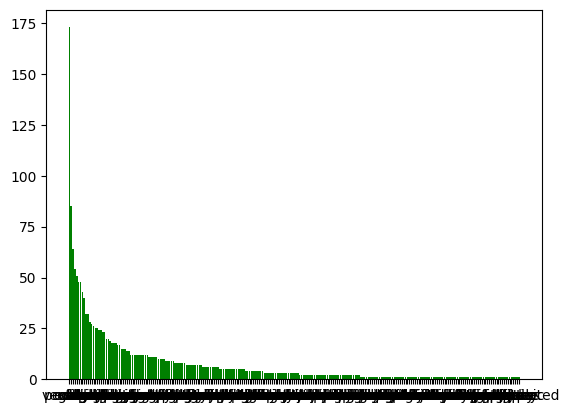

In [96]:
# create a histogram

import matplotlib.pyplot as plt
import numpy as np

plt.bar(sorted_occurences.keys(), sorted_occurences.values(), color='g')
plt.show()

## Onehot Encoder

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# data = pd.read_csv('dataset/outWords_beauty_words.csv')